In [1]:
import matplotlib.pyplot as plt # to plot graph
import matplotlib.image as mpimg
import random # to generate random numbers
import math
%matplotlib inline

Text(0.5, 1.0, 'An Ideal ANN Model')

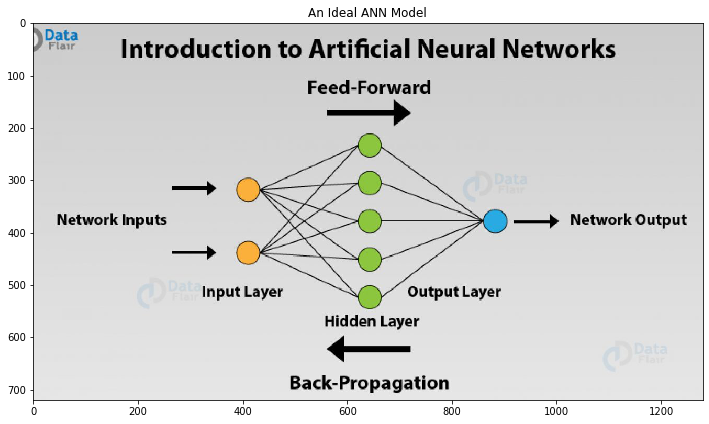

In [2]:
plt.rcParams["figure.figsize"] = (12, 10)
img = mpimg.imread("ann_model.JPG")
plt.imshow(img)
plt.title("An Ideal ANN Model")

Text(0.5, 1.0, 'Post Mortem of ANN Model')

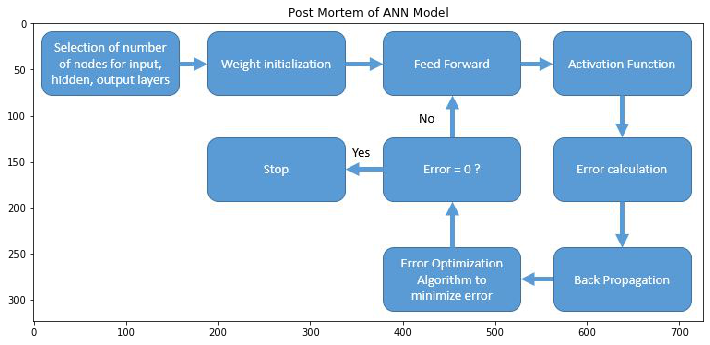

In [3]:
plt.rcParams["figure.figsize"] = (12, 10)
img = mpimg.imread("post_mortem_of_ann_model.JPG")
plt.imshow(img)
plt.title("Post Mortem of ANN Model")

Text(0.5, 1.0, 'Learning ANN with MR. XOR')

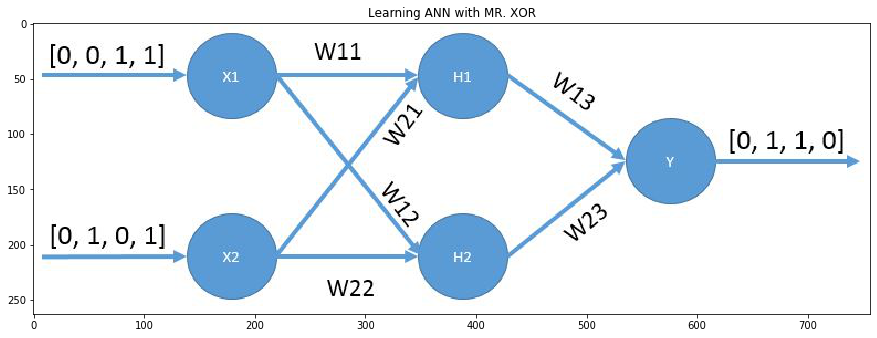

In [4]:
plt.rcParams["figure.figsize"] = (15, 15)
img = mpimg.imread("learning_ann_with_mr_xor.JPG")
plt.imshow(img)
plt.title("Learning ANN with MR. XOR")

In [5]:
# X1, X2 are two input lists
# Y is the output list
# [N.B. array is called list in python]
X1 = [0, 0, 1, 1]
X2 = [0, 1, 0, 1]
Y  = [0, 1, 1, 0]

In [6]:
# random weights initialization
w11 = random.random() # number between 0.0 and 1.0
w12 = random.random()
w21 = random.random()
w22 = random.random()
w13 = random.random()
w23 = random.random()

w11, w12, w21, w22, w13, w23

(0.6814942306431819,
 0.2629599853593051,
 0.5054782689251945,
 0.608449379795939,
 0.9971066550535118,
 0.47238915818082594)

In [7]:
# Error 
mse = 0.0 # mean squared error
# derivative of error
dmse = [0, 0, 0, 0]

# dataset length
dataset_length = len(X1)

net_h1_output = [0, 0, 0, 0]
h1_output     = [0, 0, 0, 0]
net_h2_output = [0, 0, 0, 0]
h2_output     = [0, 0, 0, 0]
net_y         = [0, 0, 0, 0]
y             = [0, 0, 0, 0]

In [8]:
'''
sigmoid activation function:
                      1
                  ----------
                  1 + e^(-x) 
                  
derivative of sigmoid activation function:
d   /     1      \         e^-(x)           1          e^-(x)                 e^(-x)
-- |  ----------  | =  -------------- = ---------- * ---------- = sigmoid * ----------
dx  \ 1 + e^(-x) /     {1 + e^(-x)}^2   1 + e^(-x)   1 + e^(-x)             1 + e^(-x) 

                                1 + e^(-x) - 1              / 1 + e^(-x)       1      \
                    = sigmoid * -------------- = sigmoid * |  ---------- - ----------  |
                                  1 + e^(-x)                \ 1 + e^(-x)   1 + e^(-x) /

                    = sigmoid * (1 - sigmoid)
'''


# sigmoid activation function
def sigmoid(x):
    return 1 / (1 + math.exp(-x))

# derivative of sigmoid function
def dsigmoid(x):
    return x * (1-x)

In [9]:
# feed forward
def feed_forward():
    global w11, w12, w21, w22, w13, w23,\
           mse, dmse,\
           net_h1_output, h1_output,\
           net_h2_output, h2_output,\
           net_y,  y
    
    for i in range(dataset_length):
        net_h1_output[i] = X1[i] * w11 + X2[i] * w21 #total output using weights and inputs
        h1_output[i]     = sigmoid(net_h1_output[i]) #output after mapping by activation function
        net_h2_output[i] = X1[i] * w12 + X2[i] * w22 
        h2_output[i]     = sigmoid(net_h2_output[i])
        net_y[i]         = h1_output[i] * w13 + h2_output[i] * w23
        y[i]             = sigmoid(net_y[i])
    
    # error calculation 
    mse = 0.0
    for i in range(dataset_length):
        mse += (y[i] - Y[i])**2
    mse /= dataset_length
    
    # derivative of error calculation
    #dmse = 0.0
    for i in range(dataset_length):
        dmse[i] = 2 * (y[i] - Y[i])
    
    return 0
    

# back propagation
def back_propagation():
    global w11, w12, w21, w22, w13, w23,\
           mse, dmse,\
           h1_output, h2_output, y\
    
    # Gradient Descent Algorithm - Error optimization algorithm
    # a little bit hard algo but it uses basic calculus. youtube tutorial may help to understand
    grad_w13 = 0.0
    for i in range(dataset_length):
        grad_w13 += dmse[i] * dsigmoid(y[i]) * h1_output[i]
    grad_w13 /= dataset_length
    
    grad_w23 = 0.0
    for i in range(dataset_length):
        grad_w23 += dmse[i] * dsigmoid(y[i]) * h2_output[i]
    grad_w23 /= dataset_length
    
    grad_w11 = 0.0
    for i in range(dataset_length):
        grad_w11 += dmse[i] * dsigmoid(y[i]) * w13 * dsigmoid(h1_output[i]) * X1[i]
    grad_w11 /= dataset_length
    
    grad_w12 = 0.0
    for i in range(dataset_length):
        grad_w12 += dmse[i] * dsigmoid(y[i]) * w23 * dsigmoid(h2_output[i]) * X1[i]
    grad_w12 /= dataset_length
    
    grad_w21 = 0.0
    for i in range(dataset_length):
        grad_w21 += dmse[i] * dsigmoid(y[i]) * w13 * dsigmoid(h1_output[i]) * X2[i]
    grad_w21 /= dataset_length
    
    grad_w22 = 0.0
    for i in range(dataset_length):
        grad_w22 += dmse[i] * dsigmoid(y[i]) * w23 * dsigmoid(h2_output[i]) * X2[i]
    grad_w22 /= dataset_length
    
    # update weights
    n = 1 # learning rate
    w11 -= n * grad_w11
    w12 -= n * grad_w12
    w13 -= n * grad_w13
    w21 -= n * grad_w21
    w22 -= n * grad_w22
    w23 -= n * grad_w23
    
    return 0

In [10]:
# for iterations vs error graph plot
error      = []
iterations = []

# epoches 
epoches = 100000

# Feed Forward Neural Network using back propagation
for i in range(epoches):
    iterations.append(i)
    
    feed_forward()
    
    error.append(mse)
    
    back_propagation()

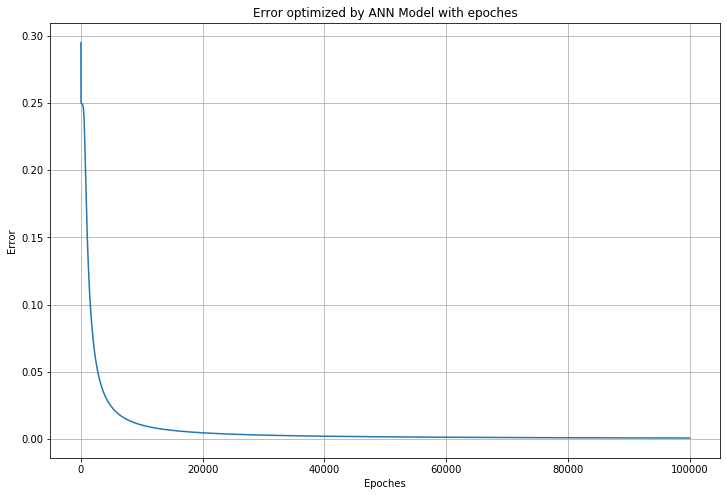

In [11]:
# iterations vs error graph plot 
plt.rcParams["figure.figsize"] = (12, 8)
plt.plot(iterations, error)
plt.title("Error optimized by ANN Model with epoches")
plt.xlabel("Epoches")
plt.ylabel("Error")
plt.grid(True)
plt.show()

In [12]:
# actual output is Y
# predicted output is y
# predicted output after thresholded is y_thresholded (> 0.5 is 1 else 0)
y_thresholded = [0, 0, 0, 0]
for i in range(dataset_length):
    if y[i] > 0.5:
        y_thresholded[i] = 1
    else:
        y_thresholded[i] = 0
        
# jupyter notebook variable print
Y, y, y_thresholded

([0, 1, 1, 0],
 [0.010600678584371182,
  0.9712996132170831,
  0.9712996191911272,
  0.03853343982402141],
 [0, 1, 1, 0])